# Logistic Regression

## Setup

In [108]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("ML-Regression-Notebooks"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/ML-Regression-Notebooks


In [109]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Data

In [111]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [112]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Perform Logit Regression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [122]:
X.min(), X.max()

(0.1, 2.5)

In [123]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_proba.round(3)

array([[0.998, 0.002],
       [0.998, 0.002],
       [0.998, 0.002],
       ...,
       [0.006, 0.994],
       [0.006, 0.994],
       [0.006, 0.994]])

## Decision Boundaries

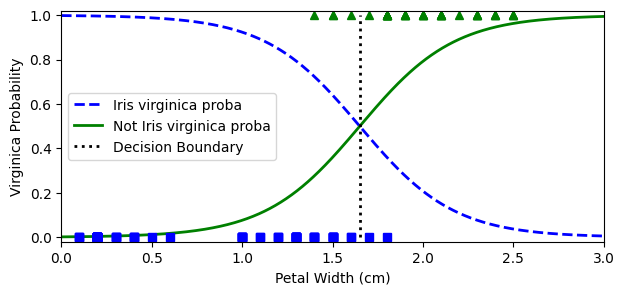

In [124]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(7, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2,
         label="Not Iris virginica proba")
plt.plot((decision_boundary, decision_boundary), (0, 1), "k:", linewidth=2,
         label="Decision Boundary")
plt.axis([0, 3, -0.02, 1.02])

X_virginica, y_virginica = X_train[y_train==1], y_train[y_train==1]
X_non_virginica, y_non_virginica = X_train[y_train==0], y_train[y_train==0]

plt.plot(X_virginica, y_virginica, "g^")
plt.plot(X_non_virginica, y_non_virginica, "bs")

plt.xlabel("Petal Width (cm)")
plt.ylabel("Virginica Probability")

plt.legend()
plt.show()

In [125]:
decision_boundary

1.6516516516516517

In [126]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])